In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics 
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score, accuracy_score, classification_report
from sklearn.metrics.cluster import contingency_matrix

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r"C:\Users\mchep\OneDrive\Desktop\Projects\City-of-Melbourne-Development-Activity-Monitor\Data\development-activity-monitor.csv")

### Analysis of Data

In [ ]:
# Print the shape of the dataset

df.shape 

(1430, 42)

In [ ]:
# Print the data types

df.dtypes

data_format                     object
development_key                 object
status                          object
year_completed                 float64
clue_small_area                 object
clue_block                       int64
street_address                  object
property_id                      int64
property_id_2                  float64
property_id_3                  float64
property_id_4                  float64
property_id_5                  float64
floors_above                     int64
resi_dwellings                   int64
studio_dwe                       int64
one_bdrm_dwe                     int64
two_bdrm_dwe                     int64
three_bdrm_dwe                   int64
student_apartments               int64
student_beds                     int64
student_accommodation_units      int64
institutional_accom_beds         int64
hotel_rooms                      int64
serviced_apartments              int64
hotels_serviced_apartments       int64
hostel_beds              

In [ ]:
# Print all the possible values of the feature “status”.

print('The unique values of the status column are:')
df.status.unique()

The unique values of the status column are:


array(['COMPLETED', 'APPLIED', 'APPROVED', 'UNDER CONSTRUCTION'],
      dtype=object)

In [ ]:
# Calculate the percentage ratio of each “status” value. 

status = pd.DataFrame(df, columns = ['status'])
status['percent'] = round(status['status'].value_counts()/(status['status'].count()) * 100, 2).reset_index(drop=True)
print(status)

         status  percent
0     COMPLETED    70.07
1     COMPLETED    17.48
2     COMPLETED     6.50
3     COMPLETED     5.94
4     COMPLETED      NaN
...         ...      ...
1425  COMPLETED      NaN
1426  COMPLETED      NaN
1427  COMPLETED      NaN
1428  COMPLETED      NaN
1429  COMPLETED      NaN

[1430 rows x 2 columns]


In [ ]:
# Remove null values from percent column

status.dropna()

,status,percent
0,COMPLETED,70.07
1,COMPLETED,17.48
2,COMPLETED,6.50
3,COMPLETED,5.94


### Relationship Between Suburbs and Developments with Floors Above Ground Level

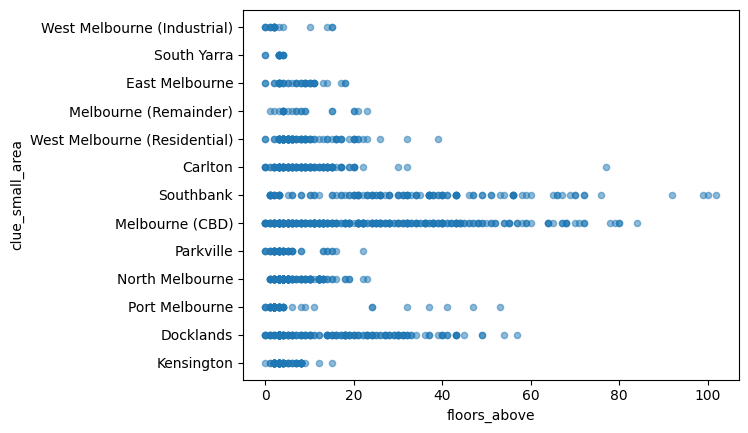

In [ ]:
# Plot the relationship between “floors_above” and “clue_small_area”
csa_fa = pd.DataFrame(df, columns = ['clue_small_area', 'floors_above'])
csa_fa.plot.scatter(x="floors_above", y="clue_small_area", alpha=0.5)
plt.show()

Results show that the Southbank and Melbourne (CBD) locations have the largest number of developments with floors above ground level.

Southbank and Melbourne CBD are the central business and cultural districts of Melbourne. They attract significant commercial, residential, and entertainment activities, leading to a high demand for space. As a result, developers focus on constructing multi-story buildings to maximize land utilisation.

These central areas have limited space for horizontal expansion due to their urban density. As a result, vertical development becomes a practical solution to accommodate the growing population and meet various needs.

### Analysis of Suburbs

In [ ]:
# Print the number of properties in each different suburb

suburb_counts = pd.DataFrame(df, columns = ['clue_small_area']).value_counts()
print(suburb_counts)

clue_small_area             
Melbourne (CBD)                 338
Docklands                       196
North Melbourne                 186
Carlton                         137
Southbank                       134
West Melbourne (Residential)    113
Kensington                       85
Port Melbourne                   78
Parkville                        61
East Melbourne                   42
Melbourne (Remainder)            23
West Melbourne (Industrial)      21
South Yarra                      16
Name: count, dtype: int64


Results show there are more developments in Melbourne (CBD) than any other suburb.

Melbourne CBD, Docklands, North Melbourne, Carlton, Southbank, and West Melbourne (Residential) have relatively higher counts, indicating a concentration of multi-story developments in these central and inner-city areas.

Suburbs that are located in close proximity to the CBD, such as Kensington and Port Melbourne, also have notable counts, suggesting a continuation of the trend of vertical developments from the city center to its surroundings.

Suburbs like Parkville and East Melbourne, known for their proximity to major educational and medical institutions, also have a significant number of developments with floors above ground level.

West Melbourne (Industrial) might have fewer developments due to its industrial nature, while South Yarra, a more residential and upscale area, has a relatively lower count.

In [ ]:
# Print the suburb with the smallest number of developments

under_construct = df.loc[df['status'] == 'UNDER CONSTRUCTION']
under_construct = under_construct.groupby(['clue_small_area'])['status'].size().sort_values()
under_construct = under_construct.nsmallest(2)
print('The suburb with the smallest number of properties under construction:', under_construct)

The suburb with the smallest number of properties under construction: clue_small_area
South Yarra                    1
West Melbourne (Industrial)    1
Name: status, dtype: int64


### Analysis of Status Values

In [ ]:
# Print the count of different status values for different year groups (based on 5 year intervals).

status_value = pd.DataFrame(df, columns = ['year_completed', 'status'])
status_value['Year Interval'] = pd.cut(status_value['year_completed'], bins=range(2002, 2023, 5), labels=['2002-2007', '2008-2013', '2014-2019', '2019-2023'])
status_value_counts = status_value.groupby(['Year Interval', 'status']).size().reset_index(name='Count')
status_value_counts

,Year Interval,status,Count
0,2002-2007,APPLIED,0
1,2002-2007,APPROVED,0
2,2002-2007,COMPLETED,199
3,2002-2007,UNDER CONSTRUCTION,0
4,2008-2013,APPLIED,0
5,2008-2013,APPROVED,0
6,2008-2013,COMPLETED,309
7,2008-2013,UNDER CONSTRUCTION,0
8,2014-2019,APPLIED,0
9,2014-2019,APPROVED,0


<Axes: xlabel='Year Interval'>

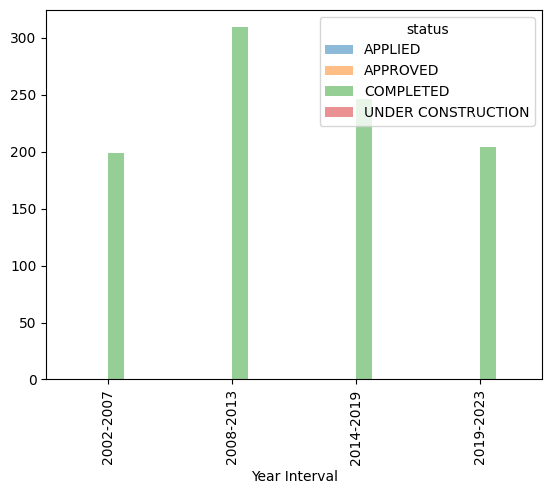

In [ ]:
# Visualise the distribution of values across the different year groups

pivot_table = pd.pivot_table(status_value_counts, values='Count', index='Year Interval', columns='status')
pivot_table.plot(kind='bar', alpha=0.5)

### Analysis Using Clustering

In [2]:
print(cpu_count_physical)
raise ValueError(f"found {cpu_count_physical} physical cores < 1")

NameError: name 'cpu_count_physical' is not defined

  File "c:\Users\mchep\anaconda3\envs\my_env2\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


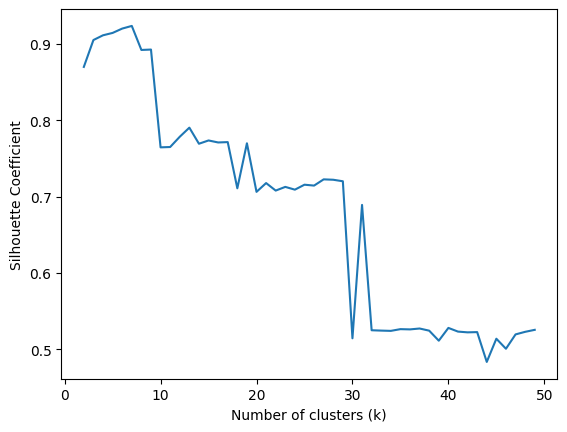

In [ ]:
# Create a new df without clue_small_area
# Perform clustering on developments and determine the number of clusters

d = df.drop(columns=["clue_small_area"])

cols = ["year_completed", "data_format", "status", "street_address", "town_planning_application", "street_address", "development_key", "geopoint"]

d["latitude"] = d["latitude"].astype(float)

d = d.drop(columns=cols)
d = d.replace(np.nan, 0)

# Calculate silhouette coefficient for different values of k
silhouette_scores = []
for k in range(2, 50):
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(d)
    silhouette_scores.append(silhouette_score(d, cluster_labels))

# Plot silhouette coefficient scores for different values of k
plt.plot(range(2, 50), silhouette_scores)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.show()

In [ ]:
# Determine the optimum value of k
unique_count = df['clue_small_area'].nunique()
optimal_k = np.argmax(silhouette_scores) + 2
print("Number of suburbs:", unique_count)
print("Optimum value of k: {}".format(optimal_k))

Number of suburbs: 13
Optimum value of k: 7


The optimum value of k is the number of clusters that best fits the data. In this case, the analysis suggests that the best value for k is determined to be 7.

Results show the optimum value of k is 7 is not equal to the number of suburbs in the clue_small_area feature.

### K-Means Clustering

In [ ]:
# Class Matrix
y_true = df['clue_small_area'].values

# Perform K-means clustering with optimal_k value
kmeans = KMeans(n_clusters=optimal_k)
y_pred_km = kmeans.fit_predict(d)

# Add the y_pred cluster labels as new column in the dataframe
d['y_pred'] = y_pred_km

# Calculate Purity Score
def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

print('Kmeans Purity Score: %0.3f' % purity_score(y_true, y_pred_km))

Kmeans Purity Score: 0.341


The K-means Purity Score is a measure used to evaluate the quality of clusters created by the K-means clustering algorithm in unsupervised machine learning. 

K-means Purity Score of 0.341 indicates that the clustering results are moderately aligned with the true class labels.

### Analysis of Different Distance Metrics for K-Means 12

In [ ]:
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric, type_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder

# Features
features = d.values

# Prepare initial centers
initial_centers = random_center_initializer(features, optimal_k, random_state=5).initialize()

# Create metric that will be used for clustering
metric_e = distance_metric(type_metric.EUCLIDEAN)
metric_c = distance_metric(type_metric.CHEBYSHEV)
metric_m = distance_metric(type_metric.MANHATTAN)

# Create instance of K-Means algorithm with prepared centers
kmeans_e = kmeans(features, initial_centers=initial_centers, metric=metric_e)
kmeans_c = kmeans(features, initial_centers=initial_centers, metric=metric_c)
kmeans_m = kmeans(features, initial_centers=initial_centers, metric=metric_m)

#Run cluster analysis
kmeans_e.process()
kmeans_c.process()
kmeans_m.process()

# Obtain cluster labels for the data points
cluster_labels_e = kmeans_e.get_clusters()
cluster_labels_c = kmeans_c.get_clusters()
cluster_labels_m = kmeans_m.get_clusters()

# Enumerate encoding type to index labeling to get labels
pyEncoding_e = kmeans_e.get_cluster_encoding()
pyEncoder_e = cluster_encoder(pyEncoding_e, cluster_labels_e, features)
pyLabels_e = pyEncoder_e.set_encoding(0).get_clusters()

pyEncoding_c = kmeans_c.get_cluster_encoding()
pyEncoder_c = cluster_encoder(pyEncoding_c, cluster_labels_c, features)
pyLabels_c = pyEncoder_c.set_encoding(0).get_clusters()

pyEncoding_m = kmeans_m.get_cluster_encoding()
pyEncoder_m = cluster_encoder(pyEncoding_m, cluster_labels_m, features)
pyLabels_m = pyEncoder_m.set_encoding(0).get_clusters()

# Report Purity Score
purity = purity_score(y_true, pyLabels_e)
print(f"The purity score for Euclidean distance is {round(purity*100, 2)}%")

# Report Purity Score
purity = purity_score(y_true, pyLabels_c)
print(f"The purity score for Chebyshev distance is {round(purity*100, 2)}%")

# Report Purity Score
purity = purity_score(y_true, pyLabels_m)
print(f"The purity score for Manhattan distance is {round(purity*100, 2)}%")

The purity score for Euclidean distance is 33.5%
The purity score for Chebyshev distance is 34.41%
The purity score for Manhattan distance is 33.57%


Results show the highest purity score was achieved with Manhattan distance, which had a purity score of 33.57%. This suggests that the clusters generated using Manhattan distance were more homogeneous and separated than those generated using Euclidean and Chebyshev distances.

It's important to note that the purity scores above are quite low, and suggest that the clustering results may not be very accurate. 

### Analysis of Hierachical Clustering 

In [ ]:
# Class Matrix
y_true_hc = df['clue_small_area']

# Perform hierachical clustering with optimal_k value
hc = AgglomerativeClustering(n_clusters = optimal_k)

# Fit and predict on the data
y_pred_hc = hc.fit_predict(d)

# Save the predictions as a column
d['y_pred_hc'] = y_pred_hc

# Calculate Purity Score
def purity_score(y_true_hc, y_pred_hc):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true_hc, y_pred_hc)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

print('Hierachical Clustering Purity Score: %0.3f' % purity_score(y_true_hc, y_pred_hc))

Hierachical_clustering_purity_score: 0.339


The purity score for the hierarchical clustering algorithm is 0.339, while the purity score for the K-means clustering algorithm is 0.339.

Comparing the two purity scores, we can see that the K-means clustering algorithm has a higher purity score, indicating that it produces a more pure clustering result. This is because K-means clustering is generally better suited for datasets with well-defined clusters and can produce tighter, more compact clusters compared to hierarchical clustering.